<a href="https://colab.research.google.com/github/Yyyyyjkim/ML_models/blob/main/xgboost/xgboost_multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost
import pandas as pd
from sklearn.datasets import load_diabetes

# prepare data

In [ ]:
data = load_diabetes()
data_df = pd.DataFrame(data['data'], columns=data['feature_names'])
data_df['target'] = data['target']

In [ ]:
data_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
x_columns = data['feature_names'][:9]
y_columns = ['s6', 'target']

# train vs test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df[x_columns], data_df[y_columns], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 9) (89, 9)
(353, 2) (89, 2)


# model fitting

In [ ]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

In [ ]:
# multi target 각각의 모델을 적합하는 방식
model = xgboost.XGBRegressor()
multioutput_model = MultiOutputRegressor(model)
multioutput_model.fit(X_train, y_train)

[04:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor())

In [ ]:
# multi target 을 순서대로 chain 방식으로 적합하는 방식
# 첫 번째 target 의 예측값은 두 번째 target 의 학습 피쳐로 사용됨
model = xgboost.XGBRegressor()
multioutput_model = RegressorChain(model, order=[0,1])
multioutput_model.fit(X_train, y_train)

[05:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RegressorChain(base_estimator=XGBRegressor(), order=[0, 1])

# predict

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred = multioutput_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'pred')

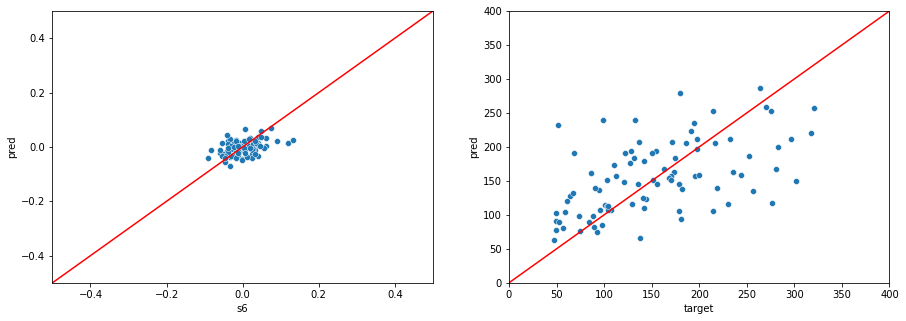

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.scatterplot(y_test['s6'], pred[:,0])
plt.gca().add_line(plt.Line2D((-0.5,0.5),(-0.5,0.5),color='r'))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.ylabel('pred')

plt.subplot(122)
sns.scatterplot(y_test['target'], pred[:,1])
plt.gca().add_line(plt.Line2D((0,400),(0,400),color='r'))
plt.xlim(0,400)
plt.ylim(0,400)
plt.ylabel('pred')